Задание 1: Обработка пропущенных значений

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic = sns.load_dataset('titanic')

missing_values = titanic.isnull().sum()

titanic['age'].fillna(titanic['age'].mean(), inplace=True)

titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

titanic['fare'].fillna(titanic['fare'].median(), inplace=True)

# print(titanic.head)

print(titanic.isnull().sum())


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


Задание 2: Поиск аномальных значений в данных о пассажирах Титаника

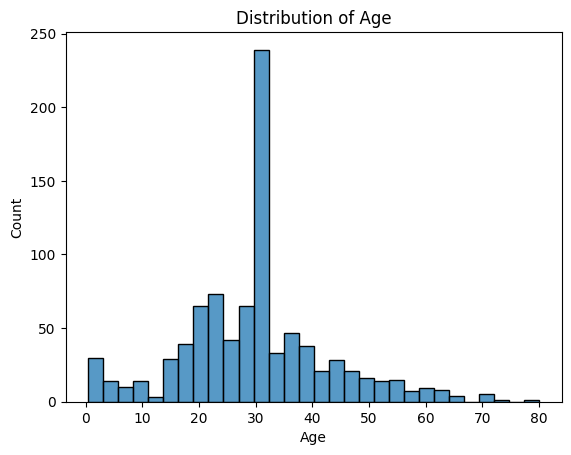

In [4]:
# Гистограмма возраста
sns.histplot(titanic['age'], kde=False)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


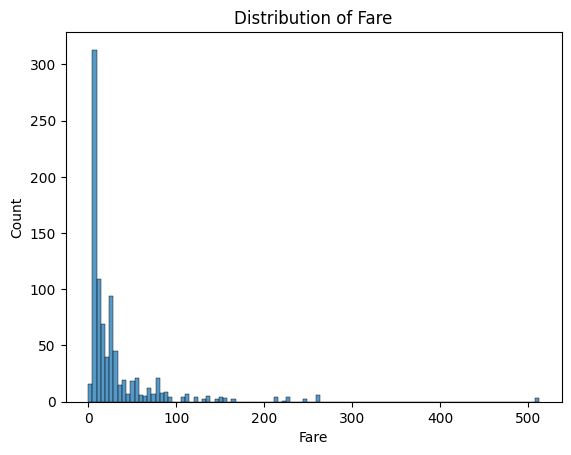

In [5]:
# Гистограмма стоимости билетов
sns.histplot(titanic['fare'], kde=False)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()


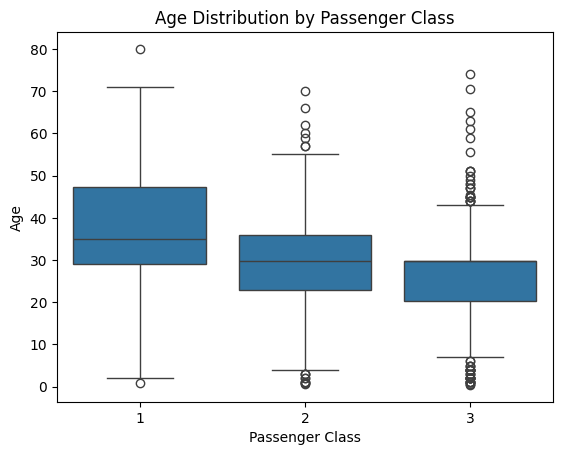

In [6]:
# Box Plot для возраста и класса
sns.boxplot(x='pclass', y='age', data=titanic)
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()


In [12]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Загрузка данных с Kaggle
url = "https://www.kaggle.com/c/titanic/train.csv"
data = titanic

# Выделение столбцов возраста и стоимости билетов
age_data = data[['age']]
fare_data = data[['fare']]

# Обработка пропущенных значений
age_data = age_data.dropna()
fare_data = fare_data.dropna()

# Обучение модели Isolation Forest на столбце возраста
age_model = IsolationForest()
age_model.fit(age_data)

# Обучение модели Isolation Forest на столбце стоимости билетов
fare_model = IsolationForest()
fare_model.fit(fare_data)

# Определение аномальных значений для столбца возраста
age_anomalies = age_model.predict(age_data)

# Определение аномальных значений для столбца стоимости билетов
fare_anomalies = fare_model.predict(fare_data)

# Вывод аномальных значений для столбца возраста
print("Аномальные значения для возраста:")
print(age_data[age_anomalies == -1])

# Вывод аномальных значений для столбца стоимости билетов
print("Аномальные значения для стоимости билетов:")
print(fare_data[fare_anomalies == -1])

Аномальные значения для возраста:
      age
1    38.0
6    54.0
7     2.0
9    14.0
10    4.0
..    ...
873  47.0
875  15.0
876  20.0
879  56.0
885  39.0

[324 rows x 1 columns]
Аномальные значения для стоимости билетов:
         fare
1     71.2833
27   263.0000
31   146.5208
34    82.1708
43    41.5792
..        ...
856  164.8667
863   69.5500
867   50.4958
872    5.0000
879   83.1583

[181 rows x 1 columns]


Задание 3: Кодирование категориальных значений

In [16]:
# # One-Hot Encoding для признака "sex"
# titanic = pd.get_dummies(titanic, columns=['sex'], drop_first=True)
# # One-Hot Encoding для признака "embarked"
# titanic = pd.get_dummies(titanic, columns=['embarked'], drop_first=True)


titanic.tail()


,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,sex_male,embarked_Q,embarked_S
886,0,2,27.000000,0,0,13.00,Second,man,True,NaN,Southampton,no,True,True,False,True
887,1,1,19.000000,0,0,30.00,First,woman,False,B,Southampton,yes,True,False,False,True
888,0,3,29.699118,1,2,23.45,Third,woman,False,NaN,Southampton,no,False,False,False,True
889,1,1,26.000000,0,0,30.00,First,man,True,C,Cherbourg,yes,True,True,False,False
890,0,3,32.000000,0,0,7.75,Third,man,True,NaN,Queenstown,no,True,True,True,False


Задание 4: Нормализация данных

In [20]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
# Создание объекта MinMaxScaler
scaler = MinMaxScaler()

# Применение Min-Max Scaling к признакам
iris_scaled = scaler.fit_transform(iris_df)
iris_scaled_df = pd.DataFrame(iris_scaled, columns=iris.feature_names)
iris_scaled_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [17]:

# Создание объекта StandardScaler
scaler = StandardScaler()

# Применение Z-score Standardization к признакам
iris_standardized = scaler.fit_transform(iris_df)
iris_standardized_df = pd.DataFrame(iris_standardized, columns=iris.feature_names)
iris_standardized_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


Задание 5: Описательная статистика

In [21]:
import pandas as pd

# Загрузка данных
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Описательные статистики
statistics = iris.describe()
print(statistics)


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


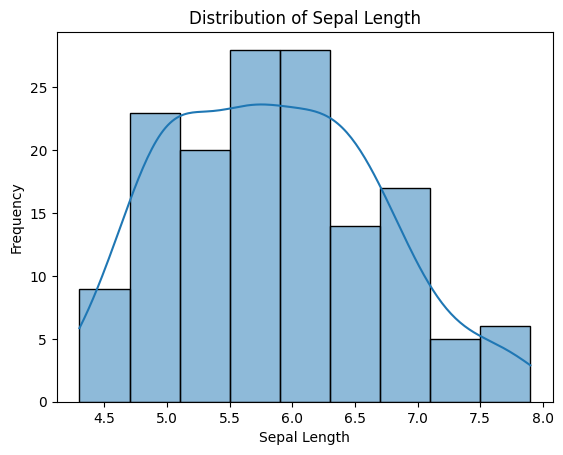

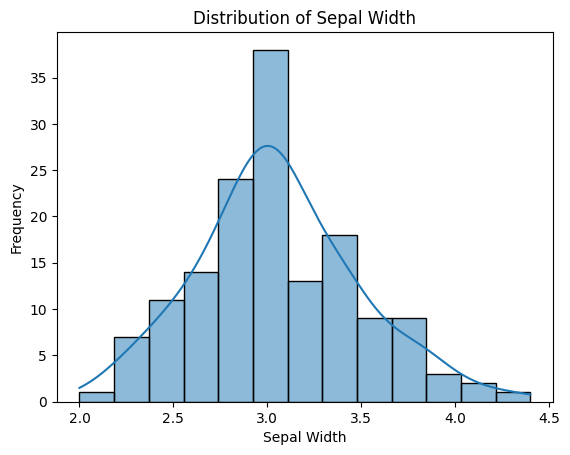

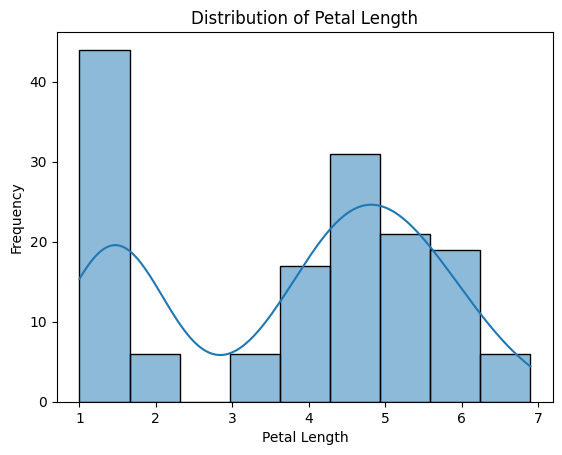

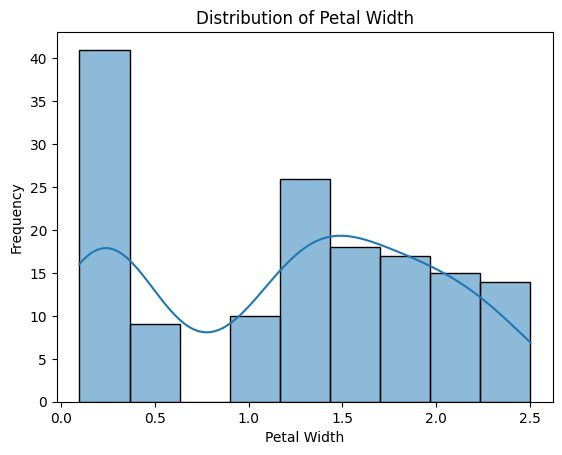

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Гистограмма для sepal length
sns.histplot(iris['sepal_length'], kde=True)
plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.show()

# Гистограмма для sepal width
sns.histplot(iris['sepal_width'], kde=True)
plt.title('Distribution of Sepal Width')
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')
plt.show()

# Гистограмма для petal length
sns.histplot(iris['petal_length'], kde=True)
plt.title('Distribution of Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.show()

# Гистограмма для petal width
sns.histplot(iris['petal_width'], kde=True)
plt.title('Distribution of Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Frequency')
plt.show()


6-задание

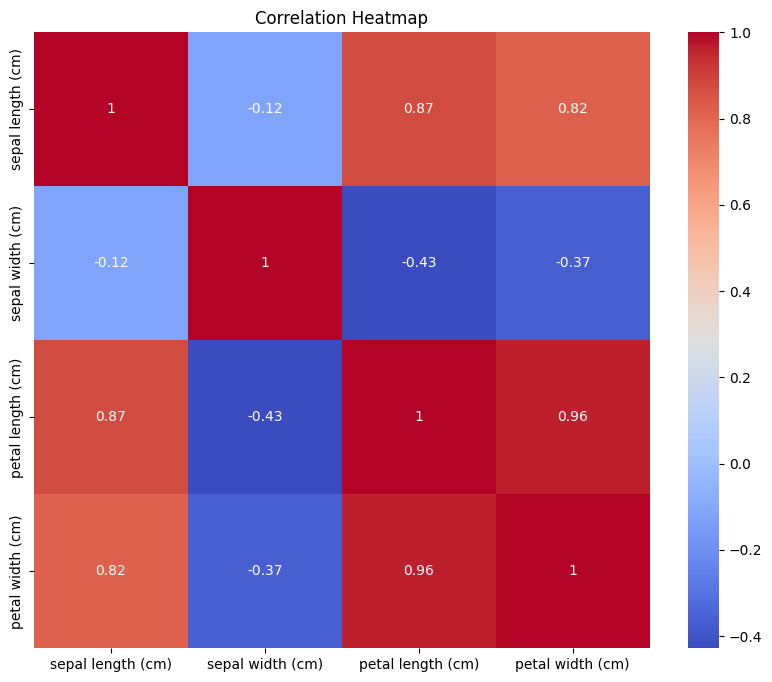

In [23]:
# Матрица корреляций
correlation_matrix = iris_df.corr()

# Визуализация тепловой карты
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()
